In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# THIS NOTEBOOK SHOWS APPLYING WATERSHED ALGORITHM BY PICKING USER CUSTOM SEEDS

In [16]:
image = cv2.imread('Glencoe-1.jpg')
img_copy = image.copy()
markers_img = np.zeros(image.shape[:2],np.int32)
segments = np.zeros(image.shape,np.uint8)

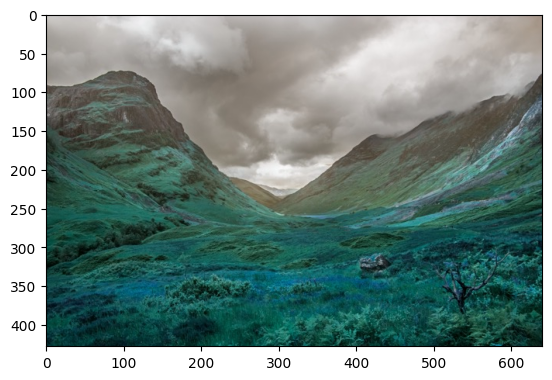

In [17]:
plt.imshow(image)

In [18]:
# GET A COLOR MAP FROM MATPLOTLIB
from matplotlib import cm

def get(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [19]:
colors = []
for i in range(10):
    colors.append(get(i))

In [20]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [21]:
# SET VARIABES
marked =False
n_col = 1
curr_marker = 1

In [22]:
def watershed(event,x,y,flags,param):
    global marked
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(markers_img,(x,y),10,(curr_marker),-1)
        cv2.circle(img_copy,(x,y),10,colors[curr_marker],-1)
        marked = True

In [25]:
cv2.namedWindow('scotland')
cv2.setMouseCallback('scotland',watershed)

while True:
    cv2.imshow('watershed image',segments)
    cv2.imshow('scotland',img_copy)
    key = cv2.waitKey(1)
    if key ==27:
        break

    # TO CLEAR WINDOWS
    elif key == ord('c'):
        img_copy = image.copy()
        segments = np.zeros(image.shape,np.uint8)
    
    # THIS IS TO CHANGE COLORS
    elif key > 0 and chr(key).isdigit():
        curr_marker = int(chr(key))

    if marked:
        markers_img_copy = markers_img.copy()
        cv2.watershed(image,markers_img_copy)
        segments = np.zeros(image.shape,np.uint8)
        for i in range(n_col):
            segments[markers_img_copy == (i)]= colors[i]
        marked=False    


cv2.destroyAllWindows()